In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('orders_data_market_basket_analysis.csv')
df.head()

,Order ID,Order Date,Product ID,Category,Product Subcategory,Sales,Quantity,Discount,Profit
0,CA-2017-152156,11/8/2017,FUR-BO-10001798,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,CA-2017-152156,11/8/2017,FUR-CH-10000454,Furniture,Chairs,731.9400,3,0.00,219.5820
2,CA-2017-138688,6/12/2017,OFF-LA-10000240,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,US-2016-108966,10/11/2016,FUR-TA-10000577,Furniture,Tables,957.5775,5,0.45,-383.0310
4,US-2016-108966,10/11/2016,OFF-ST-10000760,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [9]:
#Group by orderid and aggregrate product subcategories into list
basket = df.groupby('Order ID')['Product Subcategory'].apply(list)
basket

Order ID
CA-2015-100006                                             [Phones]
CA-2015-100090                                    [Tables, Binders]
CA-2015-100293                                              [Paper]
CA-2015-100328                                            [Binders]
CA-2015-100363                                   [Fasteners, Paper]
                                        ...                        
US-2018-168802                                            [Binders]
US-2018-169320                                   [Art, Accessories]
US-2018-169488                                       [Paper, Paper]
US-2018-169502                               [Supplies, Appliances]
US-2018-169551    [Bookcases, Paper, Phones, Storage, Accessorie...
Name: Product Subcategory, Length: 5009, dtype: object

In [13]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_array = te.fit_transform(basket)
basket_df = pd.DataFrame(data = te_array, columns = te.columns_)
basket_df.head()

,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False


In [14]:
#Apply Apriori algorithm to find most frequent itensets
from mlxtend.frequent_patterns import apriori, association_rules
frequent_itemsets = apriori(basket_df, min_support = 0.01, use_colnames= True)
frequent_itemsets

,support,itemsets
0,0.143342,(Accessories)
1,0.090038,(Appliances)
2,0.145937,(Art)
3,0.262727,(Binders)
4,0.044720,(Bookcases)
...,...,...
63,0.023358,"(Storage, Phones)"
64,0.010381,"(Tables, Phones)"
65,0.010182,"(Binders, Furnishings, Paper)"
66,0.010781,"(Binders, Phones, Paper)"


In [18]:
top_20_itemsets = frequent_itemsets.sort_values(by = 'support', ascending= False).head(20)
top_20_itemsets = top_20_itemsets.reset_index(drop = True)
top_20_itemsets

,support,itemsets
0,0.262727,(Binders)
1,0.237772,(Paper)
2,0.175085,(Furnishings)
3,0.162507,(Phones)
4,0.155121,(Storage)
5,0.145937,(Art)
6,0.143342,(Accessories)
7,0.114993,(Chairs)
8,0.090038,(Appliances)
9,0.069076,(Labels)


In [21]:
top_pairs = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == 2)].sort_values(by = 'support', ascending= False)
top_pairs = top_pairs.reset_index(drop = True)
top_pairs

,support,itemsets
0,0.054901,"(Binders, Paper)"
1,0.039728,"(Binders, Phones)"
2,0.039728,"(Storage, Binders)"
3,0.039529,"(Binders, Furnishings)"
4,0.035536,"(Storage, Paper)"
5,0.035336,"(Furnishings, Paper)"
6,0.034937,"(Phones, Paper)"
7,0.032142,"(Binders, Accessories)"
8,0.030545,"(Accessories, Paper)"
9,0.029946,"(Art, Paper)"


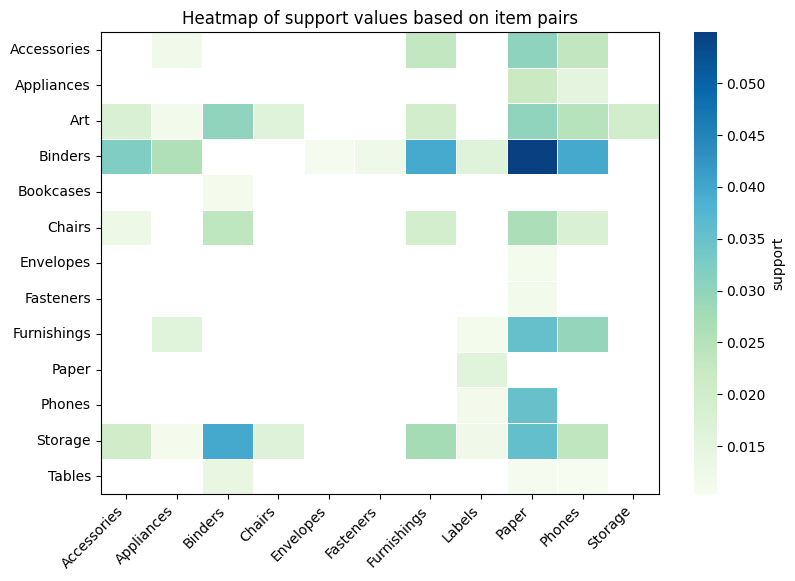

In [39]:
top_pairs['itemset_1'] = top_pairs['itemsets'].apply(lambda x: list(x)[0])
top_pairs['itemset_2'] = top_pairs['itemsets'].apply(lambda x: list(x)[1])
heatmap_data = pd.crosstab(top_pairs['itemset_1'], top_pairs['itemset_2'], values = top_pairs['support'], aggfunc= 'mean', dropna = True)

plt.figure(figsize=(9,6))
sns.heatmap(heatmap_data, cmap = 'GnBu', annot = False, fmt = '.1f', cbar_kws = {'label' : 'support'}, linewidths= 0.5)
plt.title('Heatmap of support values based on item pairs')
plt.xticks(rotation = 45, ha = 'right')
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.xlabel('')
plt.ylabel('')
plt.show()


In [43]:
top_10 = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == 2)].sort_values(by = 'support', ascending= False)
top_10 = pd.DataFrame(top_10).head(10)
top_10

,support,itemsets
43,0.054901,"(Binders, Paper)"
44,0.039728,"(Binders, Phones)"
45,0.039728,"(Storage, Binders)"
41,0.039529,"(Binders, Furnishings)"
61,0.035536,"(Storage, Paper)"
54,0.035336,"(Furnishings, Paper)"
60,0.034937,"(Phones, Paper)"
19,0.032142,"(Binders, Accessories)"
22,0.030545,"(Accessories, Paper)"
34,0.029946,"(Art, Paper)"


In [74]:
import matplotlib.colors as mcolors
import random
all_colors = list(mcolors.CSS4_COLORS.keys())
colors = random.sample(all_colors, 10)
print(colors)

['mediumvioletred', 'mediumaquamarine', 'lightcoral', 'saddlebrown', 'slategray', 'seagreen', 'deepskyblue', 'cyan', 'deeppink', 'mediumspringgreen']


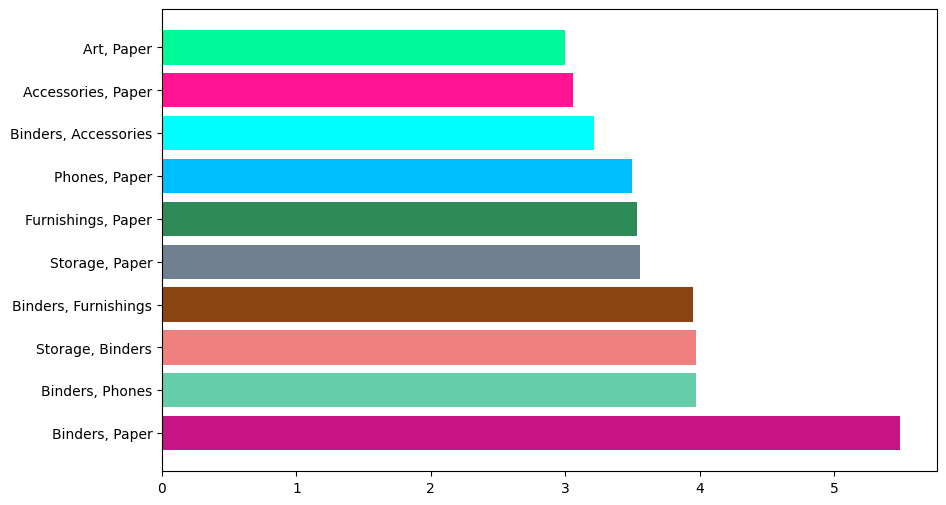

In [76]:
top_pairs = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == 2)].sort_values(ascending= False, by = 'support').head(10)
top_pairs['itemsets'] = top_pairs['itemsets'].apply(lambda x: ', '.join(list(x)))
pairs = top_pairs['itemsets']
support_values = top_pairs['support']*100
plt.figure(figsize=(10, 6))
plt.barh(pairs, support_values, color = colors)
plt.show()


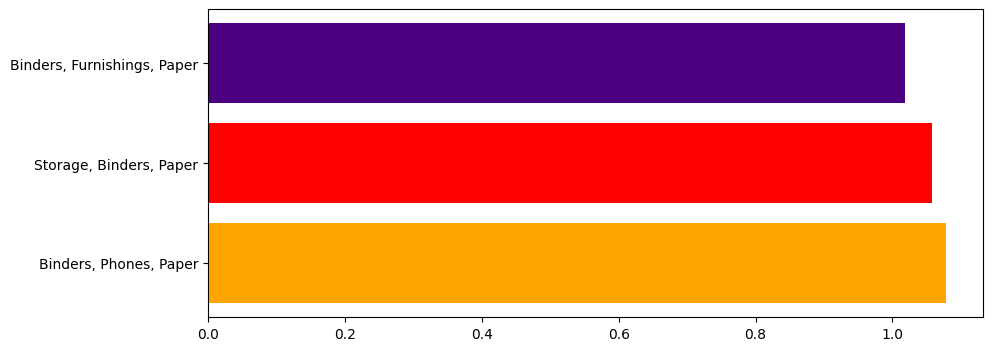

In [80]:
top_pairs = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == 3)].sort_values(ascending= False, by = 'support').head(10)
top_pairs['itemsets'] = top_pairs['itemsets'].apply(lambda x: ', '.join(list(x)))
pairs = top_pairs['itemsets']
support_values = top_pairs['support']*100
plt.figure(figsize=(10, 4))
plt.barh(pairs, support_values, color = ['Orange', 'red', 'indigo'])
plt.show()
